In [34]:
import pandas as pd
import pickle as pk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from textblob import TextBlob
from nltk.corpus import stopwords

In [35]:
data = pd.read_csv('Movie_Review.csv')

In [36]:
data.dropna(inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [38]:
data.head()

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos


In [39]:
data.tail()

,text,sentiment
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos
999,This film tells the stories of several couples...,pos


In [40]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [41]:
data['text'] = data['text'].apply(clean_review)

In [42]:
#wordcloud 

from wordcloud import WordCloud

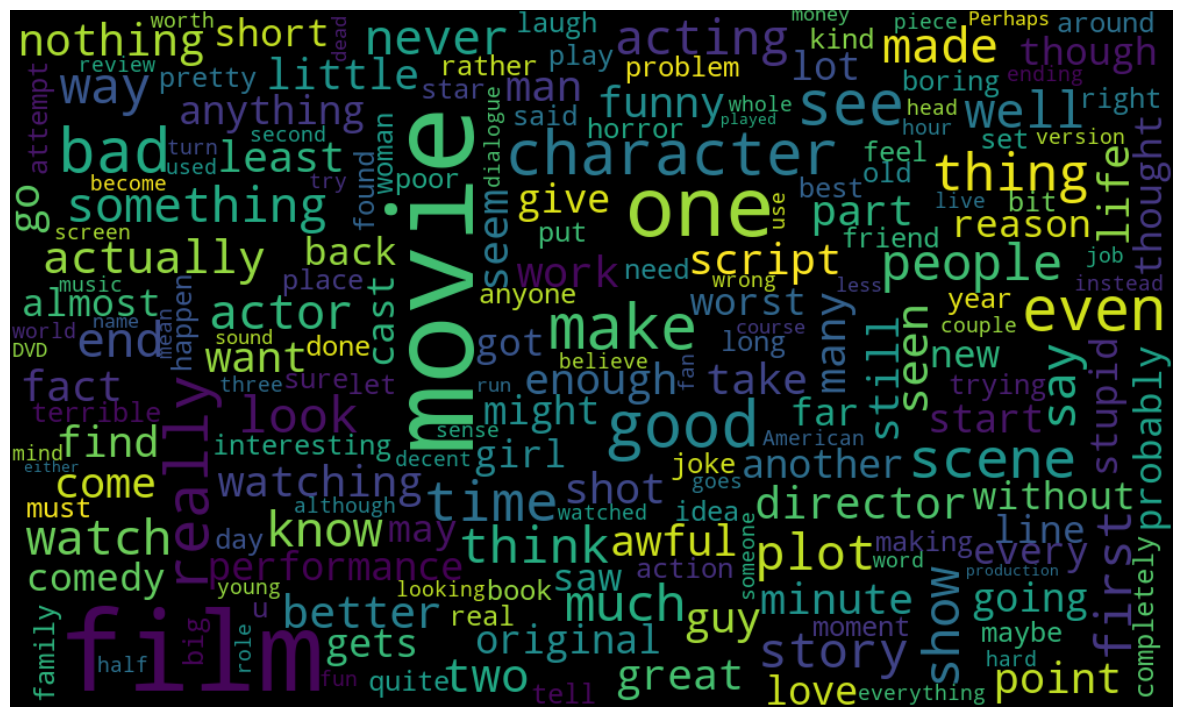

In [43]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

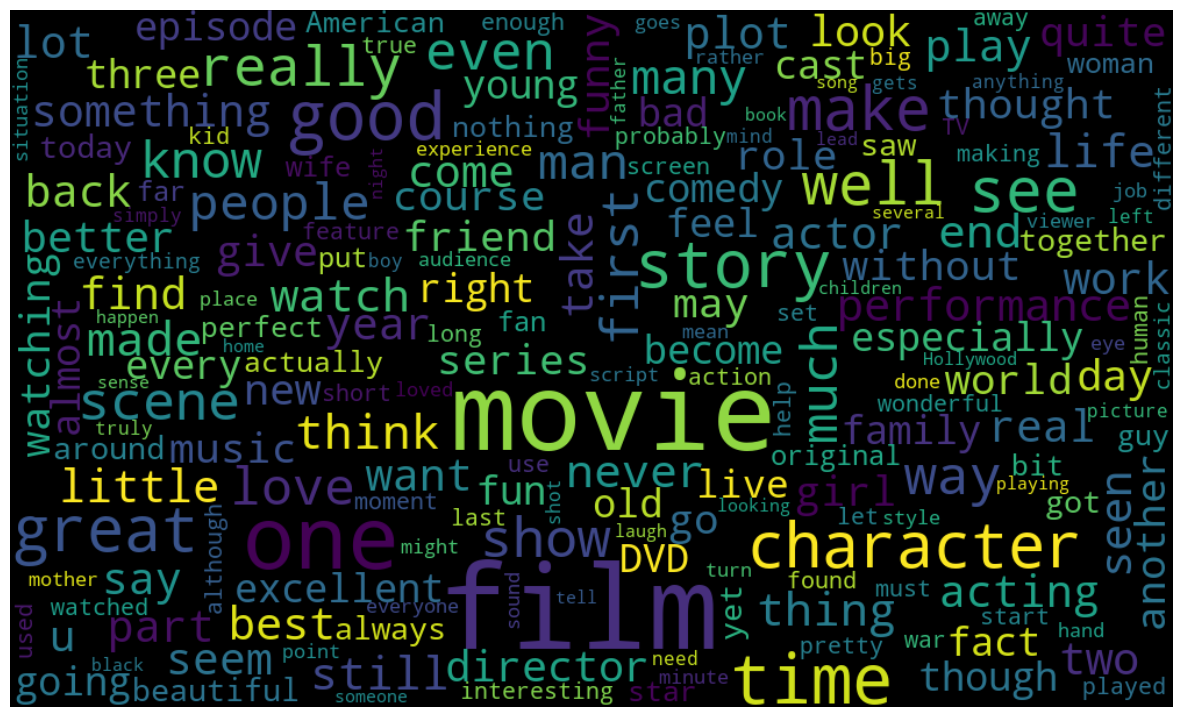

In [44]:
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

C:\Users\DAN\AppData\Local\Temp\ipykernel_4168\3769914066.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])


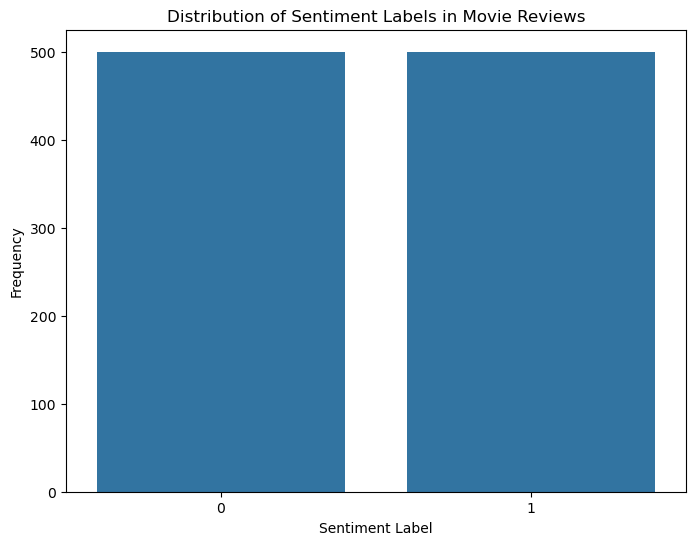

In [49]:
label_counts = data['sentiment'].value_counts()
plt.figure(figsize=(8, 6)) 
sns.barplot(x=label_counts.index, y=label_counts.values) 
plt.xlabel('Sentiment Label') 
plt.ylabel('Frequency') 
plt.title('Distribution of Sentiment Labels in Movie Reviews') 
plt.savefig('sentiment_distribution.png')
plt.show()

In [18]:
X = data['text']  # Text data
y = data['sentiment']  # Sentiment labels

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [21]:
def analyze_textblob(review):
    blob = TextBlob(review)
    sentiment = blob.sentiment
    polarity = sentiment.polarity
    subjectivity = sentiment.subjectivity
    return polarity, subjectivity

In [22]:
example_review = "The hate this movie"
polarity, subjectivity = analyze_textblob(example_review)
print(f"TextBlob Analysis - Polarity: {polarity}, Subjectivity: {subjectivity}")

TextBlob Analysis - Polarity: -0.8, Subjectivity: 0.9


In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [24]:
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Model Accuracy: 0.82
Confusion Matrix:
 [[84 17]
 [19 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       101
           1       0.82      0.81      0.82        99

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



In [25]:
with open('rf_model.pkl', 'wb') as model_file:
    pk.dump(rf_model, model_file)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pk.dump(vectorizer, vectorizer_file)

print("Random Forest model and vectorizer saved!")

Random Forest model and vectorizer saved!


In [26]:
loaded_model = pk.load(open('rf_model.pkl', 'rb'))
loaded_vectorizer = pk.load(open('vectorizer.pkl', 'rb'))

In [27]:
test_review = "bad"
transformed_review = loaded_vectorizer.transform([test_review])
result = loaded_model.predict(transformed_review)

if result[0] == 0:
    print("Predicted Sentiment: Negative")
else:
    print("Predicted Sentiment: Positive")

Predicted Sentiment: Negative


In [52]:
polarity, subjectivity = analyze_textblob(test_review)
print(f"TextBlob Insights - Polarity: {polarity}, Subjectivity: {subjectivity}")

TextBlob Insights - Polarity: -0.6999999999999998, Subjectivity: 0.6666666666666666


In [56]:

# Sample data
sample_reviews = ["This movie was great!", "I did not like this movie.", "Absolutely fantastic!"]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Transform the sample data
tfidf_matrix = vectorizer.fit_transform(sample_reviews)

# Convert to DataFrame for visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

print(tfidf_df)


   absolutely       did  fantastic     great      like     movie       not  \
0    0.000000  0.000000   0.000000  0.562829  0.000000  0.428046  0.000000   
1    0.000000  0.490479   0.000000  0.000000  0.490479  0.373022  0.490479   
2    0.707107  0.000000   0.707107  0.000000  0.000000  0.000000  0.000000   

       this       was  
0  0.428046  0.562829  
1  0.373022  0.000000  
2  0.000000  0.000000  


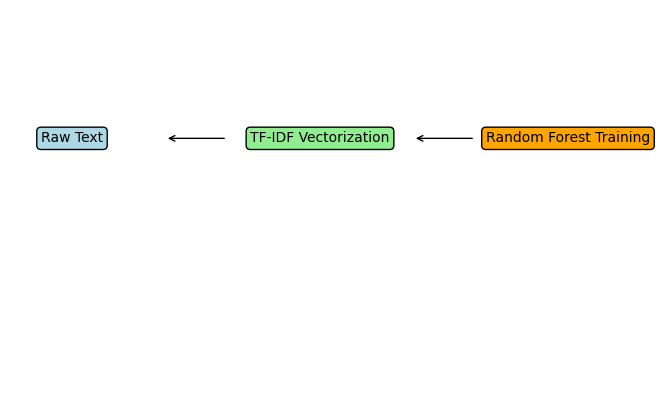

In [60]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

# Adding boxes
ax.text(1, 4, 'Raw Text', ha='center', va='center', bbox=dict(boxstyle="round", facecolor="lightblue"))
ax.text(5, 4, 'TF-IDF Vectorization', ha='center', va='center', bbox=dict(boxstyle="round", facecolor="lightgreen"))
ax.text(9, 4, 'Random Forest Training', ha='center', va='center', bbox=dict(boxstyle="round", facecolor="orange"))

# Arrows
ax.annotate('', xy=(2.5, 4), xytext=(3.5, 4), arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.annotate('', xy=(6.5, 4), xytext=(7.5, 4), arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.axis('off')
plt.show()


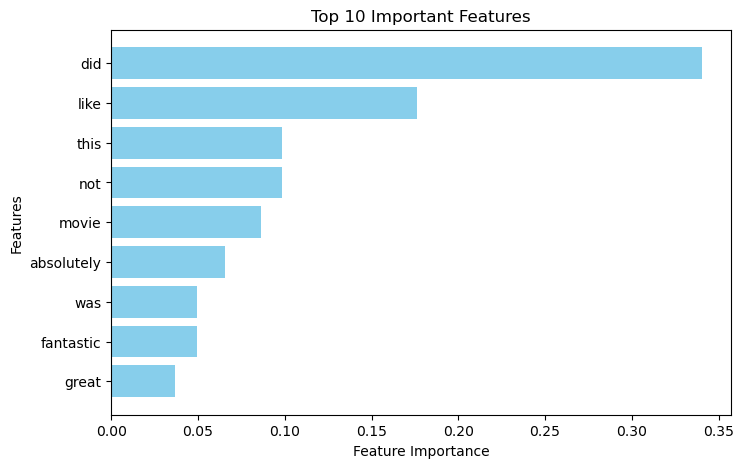

In [61]:
import numpy as np

# Assuming you already have TF-IDF transformed data and target labels
X = tfidf_matrix.toarray()  # TF-IDF transformed data
y = [1, 0, 1]  # Sentiment labels (example)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = model.feature_importances_
features = vectorizer.get_feature_names_out()

# Sort by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = np.array(features)[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot top features
plt.figure(figsize=(8, 5))
plt.barh(sorted_features[:10], sorted_importance[:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.show()


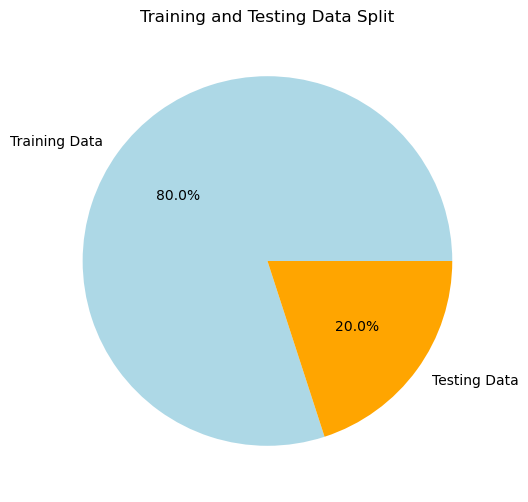

In [62]:

# Example split sizes
train_size = 0.8
test_size = 0.2

sizes = [train_size, test_size]
labels = ['Training Data', 'Testing Data']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title('Training and Testing Data Split')
plt.show()
